In [78]:
%%capture
!pip install pandas==1.0.5;
!pip install numpy==1.19.0;
!pip install seaborn==0.10.1;
!pip install matplotlib==3.2.1;
!pip install statsmodels==0.11.1;

In [79]:
import pandas                           as      pd
import numpy                            as      np
from matplotlib                         import  pyplot as plt
import seaborn                          as      sns
from sklearn                            import  metrics
import statsmodels

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [80]:
rd = pd.read_csv(r'..\data\GDP_change.csv',parse_dates=['Year'],index_col='Year'); rd.head()

,GDP
Year,
1962-01-01,-0.791615
1963-01-01,3.063226
1964-01-01,1.458597
1965-01-01,-10.088720
1966-01-01,2.580441


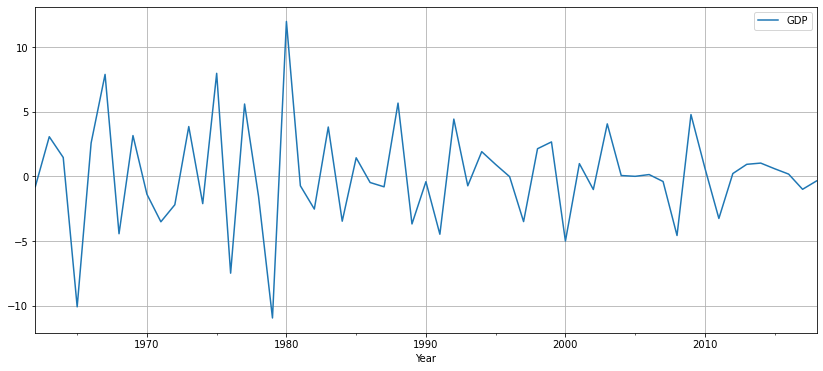

In [81]:
rd.plot(figsize=(14,6),grid=True); plt.show()

In [82]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(rd,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -4.825
DF test p-value is 0.0004231557218362579
Number of lags used 9


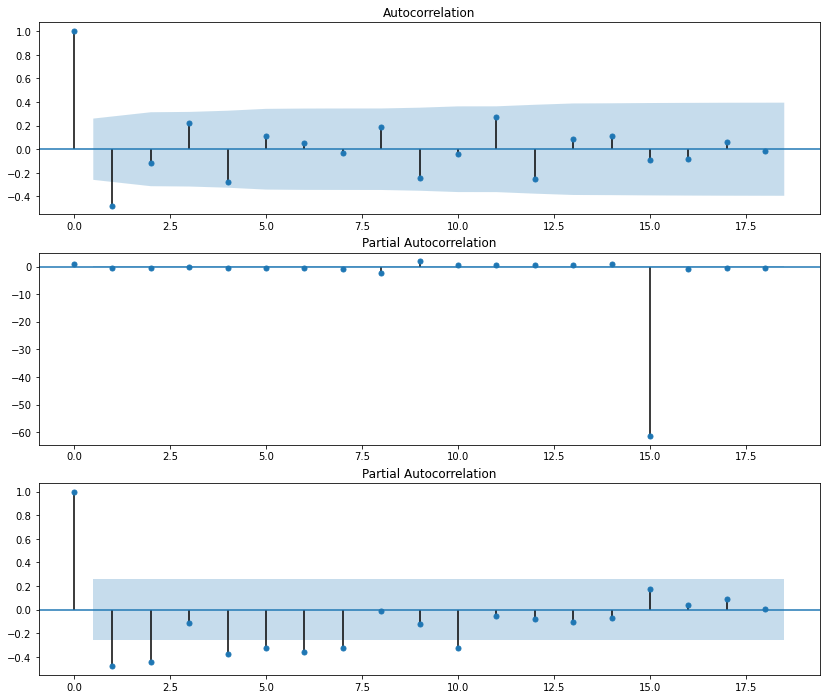

In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
figure, axes = plt.subplots(3,1,figsize=(14,12))
plot_acf(ax=axes[0],x=rd,alpha=0.05)
plot_pacf(ax=axes[1],x=rd,alpha=0.05)
plot_pacf(ax=axes[2],x=rd,alpha=0.05,method='ywmle')
plt.show();

In [84]:
rd.index.year.unique()

Int64Index([1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
            1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
            1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
            1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018],
           dtype='int64', name='Year')

In [85]:
train = rd[rd.index<='2008'] 
test = rd[rd.index>='2008']

In [86]:
train.tail()
test.head()

,GDP
Year,
2008-01-01,-4.574117
2009-01-01,4.775191
2010-01-01,0.635696
2011-01-01,-3.256240
2012-01-01,0.215014


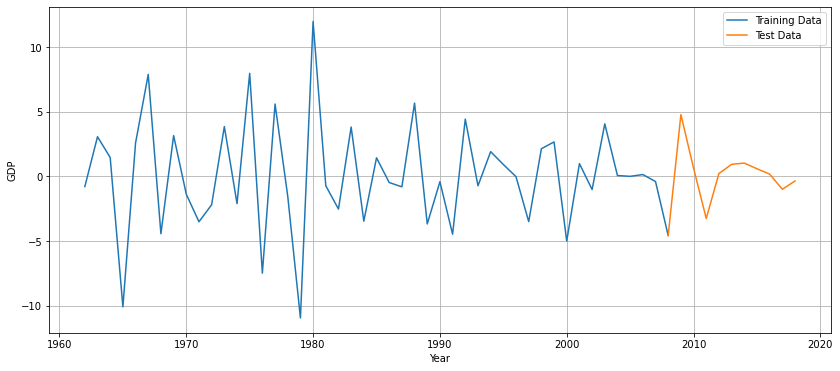

In [87]:
figure, axes = plt.subplots(1,1,figsize=(14,6))
sns.lineplot(y=train['GDP'],x=train.index)
sns.lineplot(y=test['GDP'],x=test.index)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [88]:
train = rd[rd.index<='2008'] 
test = rd[rd.index>'2008']

In [89]:
import itertools
p = q = range(0, 4)
d= range(0,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 0, 0)
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [90]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [119]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['GDP'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 0, 0) - AIC:275.2108135607825
ARIMA(0, 0, 1) - AIC:242.0143848722858
ARIMA(0, 0, 2) - AIC:241.9041217598302
ARIMA(0, 0, 3) - AIC:235.48503801863566
ARIMA(0, 1, 0) - AIC:317.83001166669254
ARIMA(0, 1, 1) - AIC:274.2798330684813
ARIMA(0, 1, 2) - AIC:246.08327739594597
ARIMA(0, 1, 3) - AIC:246.99306535704045
ARIMA(1, 0, 0) - AIC:265.0737721243822
ARIMA(1, 0, 1) - AIC:242.96185337144286
ARIMA(1, 0, 2) - AIC:244.17925465192587
ARIMA(1, 0, 3) - AIC:240.12929185610025
ARIMA(1, 1, 0) - AIC:297.01764909155264
ARIMA(1, 1, 1) - AIC:265.16552354900796
ARIMA(1, 1, 2) - AIC:247.4363326955348
ARIMA(1, 1, 3) - AIC:248.17531839634194
ARIMA(2, 0, 0) - AIC:257.79758668252225
ARIMA(2, 0, 1) - AIC:242.82116758036832
ARIMA(2, 0, 2) - AIC:244.37973350433663
ARIMA(2, 0, 3) - AIC:245.07763884979227
ARIMA(2, 1, 0) - AIC:277.60143394978064
ARIMA(2, 1, 1) - AIC:258.7869847557042
ARIMA(2, 1, 2) - AIC:247.8724420011893
ARIMA(2, 1, 3) - AIC:248.35810618392057
ARIMA(3, 0, 0) - AIC:259.35856509378755
ARIMA(3,

In [92]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
3,"(0, 0, 3)",235.485038
11,"(1, 0, 3)",240.129292
2,"(0, 0, 2)",241.904122
1,"(0, 0, 1)",242.014385
17,"(2, 0, 1)",242.821168


In [121]:
auto_ARIMA = SARIMAX(train, order=(2, 0, 3), seasonal_order=None, enforce_stationarity=False, enforce_invertibility=False)

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   47
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -106.816
Date:                Sat, 21 Aug 2021   AIC                            225.632
Time:                        18:32:21   BIC                            236.199
Sample:                    01-01-1962   HQIC                           229.528
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5188      0.292     -1.775      0.076      -1.092       0.054
ar.L2         -0.5517      0.218     -2.531      0.011      -0.979      -0.124
ma.L1         -0.7181      0.368     -1.954      0.0

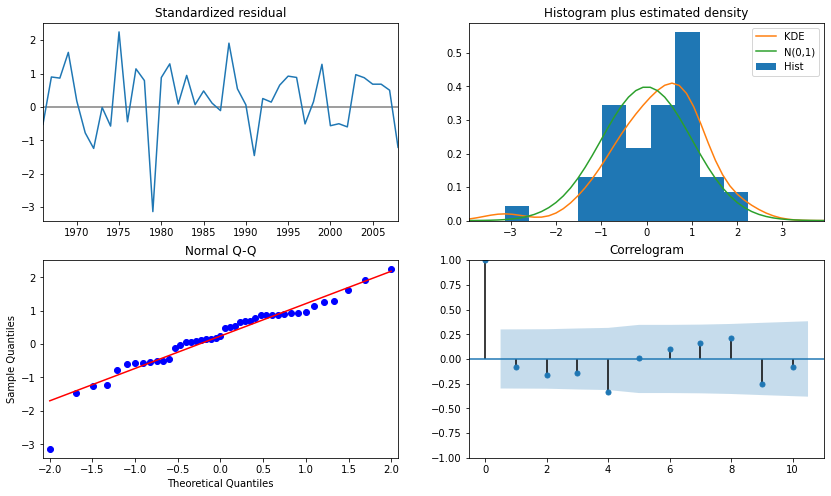

In [122]:
results_auto_ARIMA.plot_diagnostics(figsize=(14,8));

In [123]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [124]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [125]:
rmse = mean_squared_error(test['GDP'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['GDP'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1.4074452923941314 
MAPE: 41.27586160470669


In [126]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,0,3)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,0,3)",1.407445,41.275862


In [127]:
manual_ARIMA = SARIMAX(train['GDP'], order=(3,0,5),seasonal_order=None, enforce_stationarity=False, enforce_invertibility=False)

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   47
Model:               SARIMAX(3, 0, 5)   Log Likelihood                 -97.423
Date:                Sat, 21 Aug 2021   AIC                            212.846
Time:                        18:32:23   BIC                            228.269
Sample:                    01-01-1962   HQIC                           218.462
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8522      0.318     -2.684      0.007      -1.474      -0.230
ar.L2         -0.3284      0.381     -0.861      0.389      -1.076       0.419
ar.L3         -0.0722      0.242     -0.298      0.7

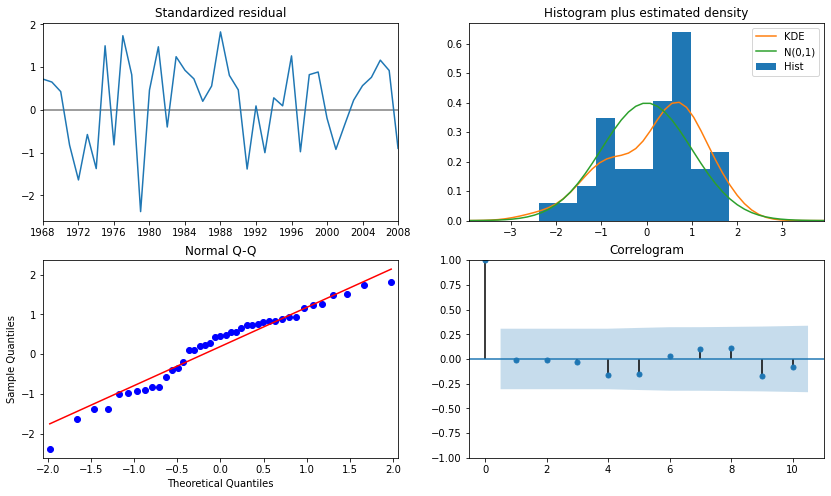

In [128]:
results_manual_ARIMA.plot_diagnostics(figsize=(14,8));

In [129]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [130]:
rmse = mean_squared_error(test['GDP'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['GDP'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1.5559984077753903 
MAPE: 53.77437542836139


In [131]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,0,5)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,0,3)",1.407445,41.275862
"ARIMA(3,0,5)",1.555998,53.774375
